- 학습 데이터의 컬럼이 하나가 아니라 다수일 수 있다. 
- 이 때문에 최소제곱법이 아닌 경사 하강법을 이용하여 기울기와 절편을 찾게 된다. 
- 컬럼의 개수 만큼 기울기를 구해야 한다. 
- 머신러닝에서는 기울기를 '가중치'로, 절편을 '바이어스' 라는 용어로 부른다. 
- 컬럼이 1개라면..
- y = (a * x) + b
- 컬럼이 2개라면..
- y = (a1 * x1) + (a2 * x2) + b


In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않도록..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 저장
import pickle

# 딥러닝
import tensorflow as tf

# 딥러닝 신경망 구조를 정의하는 것.
from tensorflow.keras.models import Sequential
# 층 구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 현재 프로젝트를 GPU에 할당한다.
# 사용한 가능한 GPU 목록을 가져온다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)


In [2]:
# 입력 데이터
공부한시간 = [2, 4, 6, 8]
과외횟수 = [0, 4, 2, 3]
# 결과데이터
성적 = [81, 93, 91, 97]


In [3]:
# 계산의 편리성을 위해 ndarray를 생성한다.
x1_data = np.array(공부한시간)
x2_data = np.array(과외횟수)
y_data = np.array(성적)

print(x1_data)
print(x2_data)
print(y_data)


[2 4 6 8]
[0 4 2 3]
[81 93 91 97]


In [4]:
# 임의의 가중치와 바이어스
a1 = 0
a2 = 0
b = 0


In [5]:
# 학습률
lr = 0.02
# 학습 횟수
epochs = 10000


In [6]:
# 학습 횟수 만큼 반복한다.
for i in range(epochs):

    # 현재의 가중치와 바이어스를 이용해 예측 결과를 가져온다.
    y_pred = (a1 * x1_data) + (a2 * x2_data) + b
    # print(y_pred)
    # 오차를 구한다
    error = y_data - y_pred
    # print(error)

    # 오차값을 가중치로 미분한 값
    a1_diff = -(2 / len(x1_data)) * sum(x1_data * error)
    a2_diff = -(2 / len(x2_data)) * sum(x2_data * error)
    # 오차값을 바이어스로 미분한 값
    b_diff = -(2 / len(x1_data)) * sum(error)

    # print(a_diff)
    # print(b_diff)

    # 학습률을 곱해 기존의 가중치와 바이어스를 업데이트 한다.
    a1 = a1 - (lr * a1_diff)
    a2 = a2 - (lr * a2_diff)
    b = b - (lr * b_diff)

    # print(기울기)
    # print(절편)
    
    # 100 회마다 한번씩 결과를 출력한다.
    if i % 100 == 0 :
        print(f'epoch : {i}, a1 : {a1}, a2 : {a2}, b : {b}')



epoch : 0, a1 : 18.56, a2 : 8.45, b : 3.62
epoch : 100, a1 : 7.299356131570395, a2 : 4.286665010585169, b : 38.042652982512955
epoch : 200, a1 : 4.568311781727336, a2 : 3.3451273722751873, b : 56.790141149124004
epoch : 300, a1 : 3.123530871282515, a2 : 2.8462827383999394, b : 66.7099863300557
epoch : 400, a1 : 2.3590568721663314, a2 : 2.5823271856465215, b : 71.95886174757398
epoch : 500, a1 : 1.9545516974228956, a2 : 2.442660701658837, b : 74.7361926881844
epoch : 600, a1 : 1.740516375960825, a2 : 2.36875914815153, b : 76.20575836457972
epoch : 700, a1 : 1.6272641317441279, a2 : 2.329655710790506, b : 76.98334782850002
epoch : 800, a1 : 1.567339112207579, a2 : 2.308964957472434, b : 77.39479277724362
epoch : 900, a1 : 1.5356310609341417, a2 : 2.2980168848281646, b : 77.61250013273312
epoch : 1000, a1 : 1.5188534190854597, a2 : 2.2922239447267723, b : 77.72769535576111
epoch : 1100, a1 : 1.5099758862602783, a2 : 2.2891587335148356, b : 77.78864846126655
epoch : 1200, a1 : 1.5052785283

In [7]:
# 결과를 예측한다
y_pred = (a1 * x1_data) + (a2 * x2_data) + b
y_pred

array([80.85714286, 93.        , 91.42857143, 96.71428571])

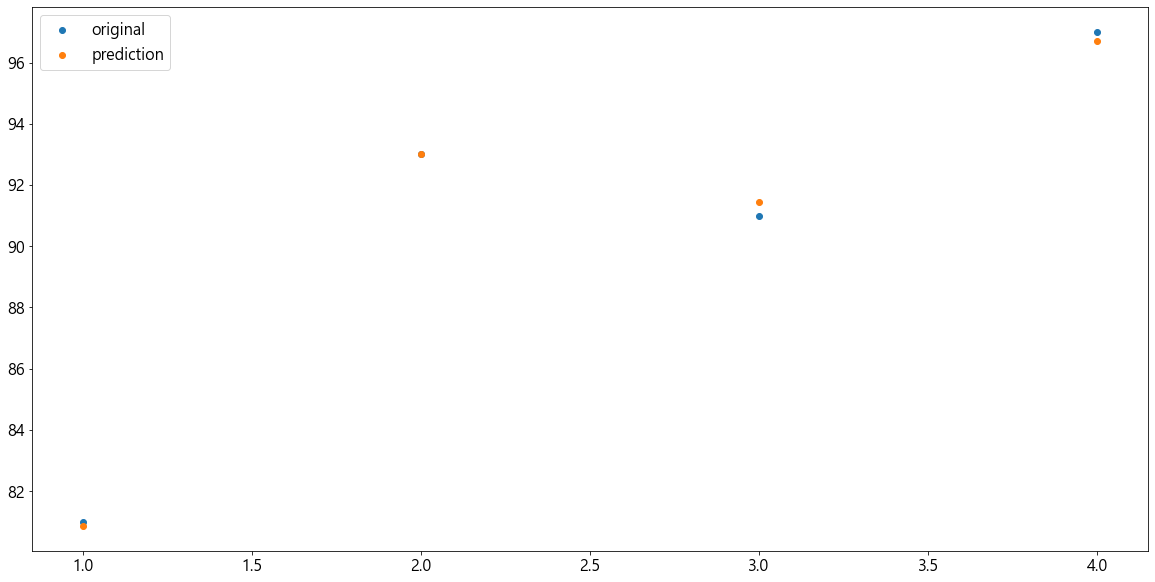

In [8]:
plt.scatter([1, 2, 3, 4], y_data, label='original')
plt.scatter([1, 2, 3, 4], y_pred, label='prediction')
plt.legend()
plt.show()
